# K-NN (K-Nearest Neighbor)

- K-NN은 입력된 테스트 데이터를 가장 가까운 K개의 학습 데이터를 바탕으로 분류하는 모델:
  - K=3: 입력 데이터의 주변 3개 데이터를 본다. 1개는 A, 2개는 B라면 B로 분류한다.
  - K=4: 주변 4개 데이터 중 2개는 A, 2개는 B라면 정해진 규칙(과반수, 랜덤 등)에 따라 분류한다.
- 붓꽃 꽃잎의 길이와 너비가 비례할 것이라는 가설을 바탕으로, 길이와 너비에 따라 붓꽃 종을 분류해본다.

사용할 데이터셋을 로드한다.

In [1]:
import pandas as pd

path = 'dataset/iris-species.csv'
data = pd.read_csv(path)

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


꽃잎의 길이와 너비 사이에 상관관계가 있는지 시각화하여 확인한다.

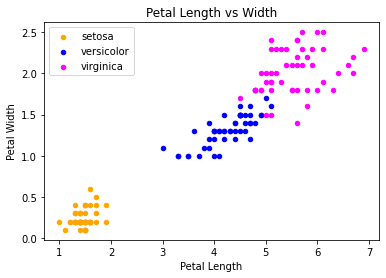

In [9]:
import matplotlib.pyplot as plt

fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='magenta', label='virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')

plt.show()

꽃잎의 길이와 너비가 비례하며, 붓꽃의 종에 따라 그 특성이 구분되는 것으로 보인다. 학습 데이터셋과 테스트 데이터셋을 분리한다.

In [3]:
from sklearn.model_selection import train_test_split

x_columns = ['PetalLengthCm', 'PetalWidthCm']
y_column = ['Species']

x_train, x_test, y_train, y_test = train_test_split(
    data[x_columns],
    data[y_column],
)

In [4]:
x_train

,PetalLengthCm,PetalWidthCm
77,5.0,1.7
64,3.6,1.3
20,1.7,0.2
148,5.4,2.3
95,4.2,1.2
...,...,...
130,6.1,1.9
100,6.0,2.5
23,1.7,0.5
29,1.6,0.2


In [5]:
y_train

,Species
77,Iris-versicolor
64,Iris-versicolor
20,Iris-setosa
148,Iris-virginica
95,Iris-versicolor
...,...
130,Iris-virginica
100,Iris-virginica
23,Iris-setosa
29,Iris-setosa


`x_train` to `y_train`으로 K-NN 모델을 학습시키고, `x_test` to `y_test` 예측의 정확도를 확인한다.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train, y_train['Species'])

res = clf.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, res))

Accuracy: 0.95
